<a href="https://colab.research.google.com/github/Nlasry1996/Nautica-Home/blob/main/FamilyItemPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/Nlasry1996/Nautica-Home.git # Connect to Github


fatal: destination path 'Nautica-Home' already exists and is not an empty directory.


Loading the Table

In [2]:
import numpy as np
import pandas as pd
df= pd.read_csv('/content/Nautica-Home/NHDataset - NHDataset.csv')
df

,Order_Date,Customer_ID,Order_ID,Quantity,City,District,Catalog_Number,Hebrew_Description,English_Description,Added_Date,Family_Item_ID,Family_Item_Name,Sales_Price_No_VAT,Sales_Price_With_VAT,Cost_Price,Cost_Import_USD,Cost_Production_USD,Size,Color_ID,Color_Name
0,4/3/2022,100110,SO22000098,1,Ir ha-Karmel,חיפה,NHD1001-15-2,ינג כחול כיסוי 100% כותנה במילוי מיקרופייבר 40...,400GSM PREMIUM MICROFIBER BLANKET BLUE PIPING 15,5/31/2021,שמיכות,שמיכות,427,499,15,0,0,150/200,2,PAGEANT BLUE
1,4/3/2022,100110,SO22000098,3,Ir ha-Karmel,חיפה,NHD1002-15-2,שמיכת פוך פייפינג כיסוי 100% כותנה מיקרופייבר ...,600GSM PREMIUM MICROFIBER BLANKET BLUE PIPING 15,5/31/2021,שמיכות,שמיכות,469,549,17,0,0,150/200,2,PAGEANT BLUE
2,4/3/2022,100110,SO22000098,1,Ir ha-Karmel,חיפה,NHT3004-15-16,מגבת גוף אפור כהה 100% כותנה 600 גר' 90/150,Body towel 100% cotton Aqua Fibro 600 gsm 90x150,5/31/2021,מגבות,מגבות אקווה פיברו,196,229,10,0,0,90/150,16,Bruschetta
3,4/3/2022,100110,SO22000098,1,Ir ha-Karmel,חיפה,NHT3005-15-26,מגבת גוף טורקיז 100% כותנה 600 גר' 90/150,Body towel 100% cotton Aqua Fibro 600 gsm 90x150,5/31/2021,מגבות,מגבות אקווה פיברו,196,229,10,0,0,90/150,26,Peach Bud
4,4/3/2022,100110,SO22000098,1,Ir ha-Karmel,חיפה,NHT3006-15-23,מגבת פסים 150X90 כחול 600 גר',STRIPE TOWEL 150X90 BLUE 600 GSM,12/15/2021,מגבות,מגבות אקווה פיברו,213,249,10,0,0,150/90,23,China Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9156,4/30/2023,103230,SO23001622,1,Ashdod,דרום,NLW-71002M8,OCEAN M Mix&Match women tank,"Mix&Match women tank,,M",11/10/2021,7000,Loungewear,102,119,5,0,5,M,8,Lolipop
9157,4/30/2023,103230,SO23001622,1,Ashdod,דרום,NLW-71003L6,-PEACH-L-Mix&Match women shorts,NaN,10/27/2021,7000,Loungewear,110,129,5,0,5,L,6,Cartouch
9158,4/30/2023,103230,SO23001622,1,Ashdod,דרום,NLW-71003L8,-OCEAN-L-Mix&Match women shorts,NaN,10/27/2021,7000,Loungewear,110,129,5,0,5,L,8,Lolipop
9159,4/30/2023,103231,SO23001624,1,Kiryat-Motzkin,חיפה,NHB1006-16-13,"סט 100% כותנה סטן 220 160 סמ BASIC L. BLUE""",NaN,3/1/2022,220B,סאטן 220 בסיק,512,599,28,28,0,160/200,13,L. PINK


In [3]:
df=df.drop(['Added_Date','Customer_ID','City',	'District','Hebrew_Description','English_Description','Cost_Import_USD'	,'Cost_Production_USD','Size','Color_ID','Color_Name','Sales_Price_With_VAT','Sales_Price_No_VAT','Cost_Price'], axis=1)

df

,Order_Date,Order_ID,Quantity,Catalog_Number,Family_Item_ID,Family_Item_Name
0,4/3/2022,SO22000098,1,NHD1001-15-2,שמיכות,שמיכות
1,4/3/2022,SO22000098,3,NHD1002-15-2,שמיכות,שמיכות
2,4/3/2022,SO22000098,1,NHT3004-15-16,מגבות,מגבות אקווה פיברו
3,4/3/2022,SO22000098,1,NHT3005-15-26,מגבות,מגבות אקווה פיברו
4,4/3/2022,SO22000098,1,NHT3006-15-23,מגבות,מגבות אקווה פיברו
...,...,...,...,...,...,...
9156,4/30/2023,SO23001622,1,NLW-71002M8,7000,Loungewear
9157,4/30/2023,SO23001622,1,NLW-71003L6,7000,Loungewear
9158,4/30/2023,SO23001622,1,NLW-71003L8,7000,Loungewear
9159,4/30/2023,SO23001624,1,NHB1006-16-13,220B,סאטן 220 בסיק


Convert Date to DateType


In [4]:
df['Order_Date'] = pd.to_datetime(df['Order_Date']) # Convert 'Order_Date' to a datetime format.
df['Month'] = df['Order_Date'].dt.month #Extract the month feature.
df=df.drop(['Order_Date'], axis=1)
df

,Order_ID,Quantity,Catalog_Number,Family_Item_ID,Family_Item_Name,Month
0,SO22000098,1,NHD1001-15-2,שמיכות,שמיכות,4
1,SO22000098,3,NHD1002-15-2,שמיכות,שמיכות,4
2,SO22000098,1,NHT3004-15-16,מגבות,מגבות אקווה פיברו,4
3,SO22000098,1,NHT3005-15-26,מגבות,מגבות אקווה פיברו,4
4,SO22000098,1,NHT3006-15-23,מגבות,מגבות אקווה פיברו,4
...,...,...,...,...,...,...
9156,SO23001622,1,NLW-71002M8,7000,Loungewear,4
9157,SO23001622,1,NLW-71003L6,7000,Loungewear,4
9158,SO23001622,1,NLW-71003L8,7000,Loungewear,4
9159,SO23001624,1,NHB1006-16-13,220B,סאטן 220 בסיק,4


In [5]:
#Count the number of times this article was bought
df_catalognumber_orders = df.groupby('Catalog_Number')['Order_ID'].count().reset_index()
df_catalognumber_orders = df_catalognumber_orders.rename(columns={'Order_ID': 'Count_Times_Articles_Appears'})
# Merge the derived feature back into the original DataFrame
df = pd.merge(df, df_catalognumber_orders, on='Catalog_Number', how='left')
#Count of how many article were sell in this Item Family
df_family_item_orders = df.groupby('Family_Item_Name')['Order_ID'].count().reset_index()
df_family_item_orders = df_family_item_orders.rename(columns={'Order_ID': 'Number_FI_per_Year'})
# Merge the derived feature back into the original DataFrame
df = pd.merge(df, df_family_item_orders, on='Family_Item_Name', how='left')
#How many of these items are sold by month
df['Family_Item_Count_Monthly'] = df.groupby(['Month', 'Family_Item_ID'])['Order_ID'].transform('count')
df

,Order_ID,Quantity,Catalog_Number,Family_Item_ID,Family_Item_Name,Month,Count_Times_Articles_Appears,Number_FI_per_Year,Family_Item_Count_Monthly
0,SO22000098,1,NHD1001-15-2,שמיכות,שמיכות,4,58,371,36
1,SO22000098,3,NHD1002-15-2,שמיכות,שמיכות,4,65,371,36
2,SO22000098,1,NHT3004-15-16,מגבות,מגבות אקווה פיברו,4,29,984,140
3,SO22000098,1,NHT3005-15-26,מגבות,מגבות אקווה פיברו,4,33,984,140
4,SO22000098,1,NHT3006-15-23,מגבות,מגבות אקווה פיברו,4,19,984,140
...,...,...,...,...,...,...,...,...,...
9156,SO23001622,1,NLW-71002M8,7000,Loungewear,4,13,2786,248
9157,SO23001622,1,NLW-71003L6,7000,Loungewear,4,5,2786,248
9158,SO23001622,1,NLW-71003L8,7000,Loungewear,4,3,2786,248
9159,SO23001624,1,NHB1006-16-13,220B,סאטן 220 בסיק,4,10,618,78


In [6]:
df=df.drop(['Order_ID','Catalog_Number','Family_Item_ID'],axis=1)
df

,Quantity,Family_Item_Name,Month,Count_Times_Articles_Appears,Number_FI_per_Year,Family_Item_Count_Monthly
0,1,שמיכות,4,58,371,36
1,3,שמיכות,4,65,371,36
2,1,מגבות אקווה פיברו,4,29,984,140
3,1,מגבות אקווה פיברו,4,33,984,140
4,1,מגבות אקווה פיברו,4,19,984,140
...,...,...,...,...,...,...
9156,1,Loungewear,4,13,2786,248
9157,1,Loungewear,4,5,2786,248
9158,1,Loungewear,4,3,2786,248
9159,1,סאטן 220 בסיק,4,10,618,78


In [7]:
df = df[df['Number_FI_per_Year'] > 500]
df

,Quantity,Family_Item_Name,Month,Count_Times_Articles_Appears,Number_FI_per_Year,Family_Item_Count_Monthly
2,1,מגבות אקווה פיברו,4,29,984,140
3,1,מגבות אקווה פיברו,4,33,984,140
4,1,מגבות אקווה פיברו,4,19,984,140
5,1,מגבות אקווה פיברו,4,31,984,140
6,1,סאטן 220,4,18,836,120
...,...,...,...,...,...,...
9156,1,Loungewear,4,13,2786,248
9157,1,Loungewear,4,5,2786,248
9158,1,Loungewear,4,3,2786,248
9159,1,סאטן 220 בסיק,4,10,618,78


Label Encoder for FamilyItemName

In [8]:
from sklearn.preprocessing import LabelEncoder # Encode Categorical variables using LabelEncoder
label_encoder = LabelEncoder()
df['Family_Item_Name'] = label_encoder.fit_transform(df['Family_Item_Name'])
df

<ipython-input-8-5b9d8b67be8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Family_Item_Name'] = label_encoder.fit_transform(df['Family_Item_Name'])


,Quantity,Family_Item_Name,Month,Count_Times_Articles_Appears,Number_FI_per_Year,Family_Item_Count_Monthly
2,1,2,4,29,984,140
3,1,2,4,33,984,140
4,1,2,4,19,984,140
5,1,2,4,31,984,140
6,1,3,4,18,836,120
...,...,...,...,...,...,...
9156,1,0,4,13,2786,248
9157,1,0,4,5,2786,248
9158,1,0,4,3,2786,248
9159,1,4,4,10,618,78


In [9]:
df.corr()

,Quantity,Family_Item_Name,Month,Count_Times_Articles_Appears,Number_FI_per_Year,Family_Item_Count_Monthly
Quantity,1.000000,0.157487,0.033389,0.012545,-0.187466,-0.128095
Family_Item_Name,0.157487,1.000000,0.226284,0.226892,-0.850166,-0.509944
Month,0.033389,0.226284,1.000000,0.102751,-0.323955,-0.483657
Count_Times_Articles_Appears,0.012545,0.226892,0.102751,1.000000,-0.224441,-0.171597
Number_FI_per_Year,-0.187466,-0.850166,-0.323955,-0.224441,1.000000,0.603361
Family_Item_Count_Monthly,-0.128095,-0.509944,-0.483657,-0.171597,0.603361,1.000000


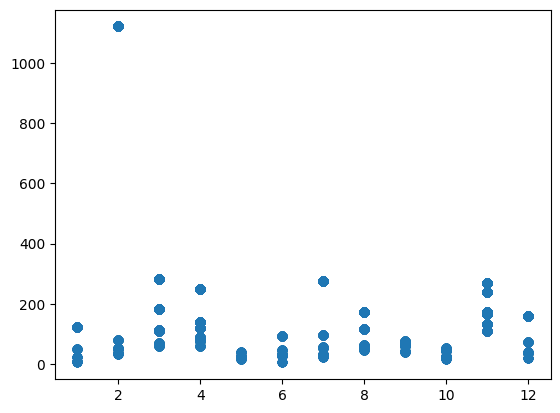

In [10]:
import matplotlib.pyplot as plt
X=df['Month']
y=df['Family_Item_Count_Monthly']
plt.scatter(X,y,marker='o')
plt.plot()
plt.show()

Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = df.drop('Family_Item_Count_Monthly', axis=1).values  # independent variable
y = df['Family_Item_Count_Monthly'].values  # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X, y)

model.fit(X_train, y_train)

predictions = model.predict(X_test)


print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Predictions:", predictions)

Coefficients: [-14.27400559  -9.26300185 -34.04364912  -0.42582317   0.17118628]
Intercept: 274.48037157793476
Predictions: [318.82407472 294.37037633 -12.81331464 ... 272.12067646 261.60419672
 -17.4973695 ]


In [13]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print("MSE:" ,mse)


MSE: 77302.86287303599


In [14]:
df_pred= pd.DataFrame(predictions)
df_pred

,0
0,318.824075
1,294.370376
2,-12.813315
3,634.148758
4,460.949750
...,...
1309,114.988003
1310,236.989455
1311,272.120676
1312,261.604197


XGBOOST

In [16]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming your dataset is stored in a DataFrame called 'data'
# Splitting the data into features (X) and target variable (y)
X = df.drop(['Family_Item_Count_Monthly'], axis=1)
y = df['Family_Item_Count_Monthly']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the XGBoost regression model
model = xgb.XGBRegressor()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)

df_predictions=pd.DataFrame(y_pred)
df_predictions


[ 49.992382  69.02745  270.00607  ... 184.0053   139.95961  270.00778 ]


,0
0,49.992382
1,69.027451
2,270.006073
3,282.003052
4,171.997620
...,...
1309,115.832413
1310,60.976662
1311,184.005295
1312,139.959610


In [17]:
# Evaluating the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.012878749328960557
